#Import all nessasery Libreary

In [ ]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Set up data set

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()



11490434/11490434 [==============================] - 1s 0us/step


# Investigate data

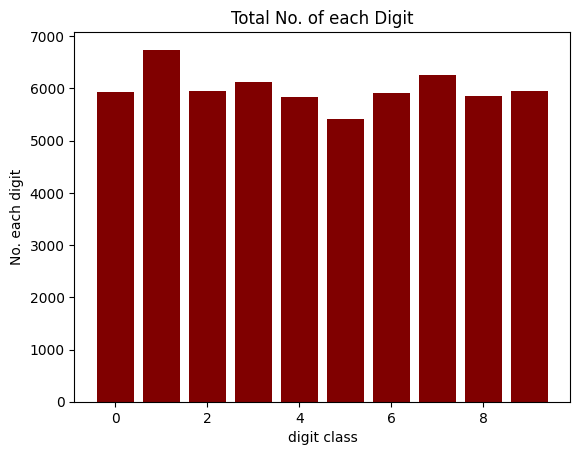

In [ ]:
plt.bar(range(10),pd.value_counts(y_train).sort_index(),color ='maroon')
plt.xlabel("digit class")
plt.ylabel("No. each digit")
plt.title("Total No. of each Digit")
plt.show()

Answer is  3


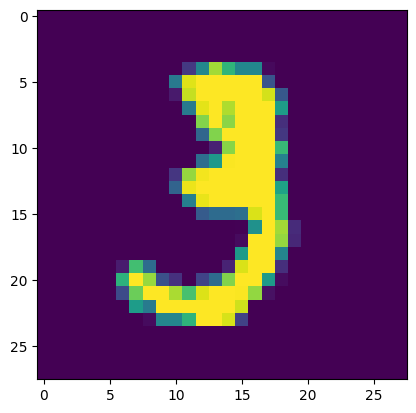

In [ ]:
plt.imshow(x_train[10])
print("Answer is ",y_train[10])

# Preprocessing

In [ ]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# Model Creation

In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(8, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(16, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 13, 13, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 400)               0         
                                                                 
 dense_4 (Dense)             (None, 10)               

In [ ]:
epochs = 5

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, epochs=epochs)

Epoch 1/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2418 - accuracy: 0.9300
Epoch 2/5
1875/1875 [==============================] - 22s 11ms/step - loss: 0.0798 - accuracy: 0.9752
Epoch 3/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0624 - accuracy: 0.9804
Epoch 4/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0534 - accuracy: 0.9836
Epoch 5/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0467 - accuracy: 0.9856


# Checking Result & Evaluation

In [ ]:
y_prob = model.predict(x_test)
y_classes = y_prob.argmax(axis=-1)

313/313 [==============================] - 1s 5ms/step


True answer is  7
Prediction answer is  7


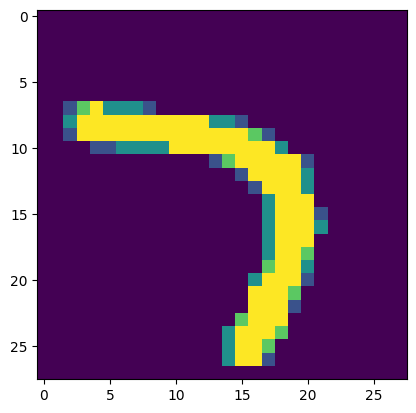

In [ ]:
pic = 60
plt.imshow(x_test[pic])
print("True answer is ",y_test[pic].argmax(axis=-1))
print("Prediction answer is ",y_classes[pic])

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.047083962708711624
Test accuracy: 0.9853000044822693


#Extra
## Dianosed what happen

313/313 [==============================] - 1s 4ms/step


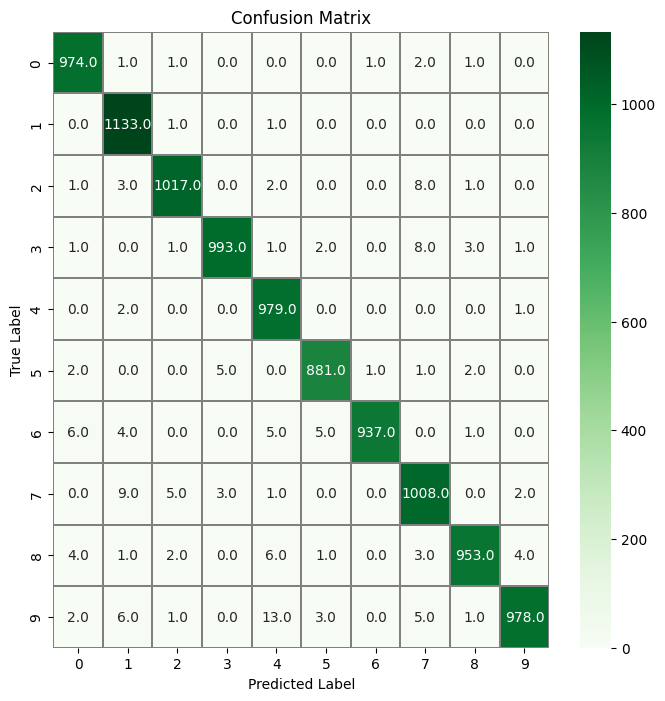

In [ ]:
# confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

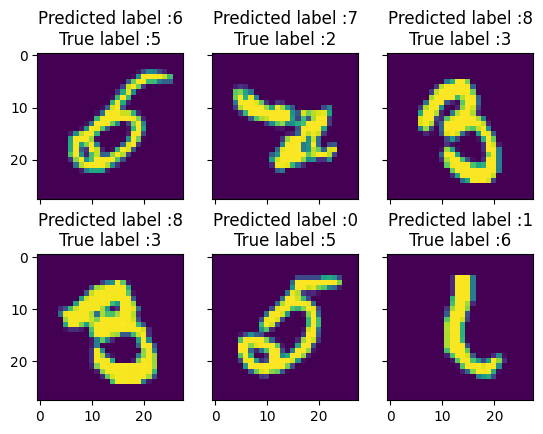

In [ ]:
# Display some error results

# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = x_test[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)